In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1],
engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
print(len(train), len(test))

96 48


In [18]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [19]:
#trainX

In [22]:
# create and fit the LSTM network
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)


Epoch 1/200
47/47 - 0s - loss: 0.0639
Epoch 2/200
47/47 - 0s - loss: 0.0262
Epoch 3/200
47/47 - 0s - loss: 0.0145
Epoch 4/200
47/47 - 0s - loss: 0.0113
Epoch 5/200
47/47 - 0s - loss: 0.0096
Epoch 6/200
47/47 - 0s - loss: 0.0084
Epoch 7/200
47/47 - 0s - loss: 0.0075
Epoch 8/200
47/47 - 0s - loss: 0.0067
Epoch 9/200
47/47 - 0s - loss: 0.0060
Epoch 10/200
47/47 - 0s - loss: 0.0056
Epoch 11/200
47/47 - 0s - loss: 0.0051
Epoch 12/200
47/47 - 0s - loss: 0.0048
Epoch 13/200
47/47 - 0s - loss: 0.0044
Epoch 14/200
47/47 - 0s - loss: 0.0041
Epoch 15/200
47/47 - 0s - loss: 0.0039
Epoch 16/200
47/47 - 0s - loss: 0.0036
Epoch 17/200
47/47 - 0s - loss: 0.0033
Epoch 18/200
47/47 - 0s - loss: 0.0032
Epoch 19/200
47/47 - 0s - loss: 0.0030
Epoch 20/200
47/47 - 0s - loss: 0.0028
Epoch 21/200
47/47 - 0s - loss: 0.0027
Epoch 22/200
47/47 - 0s - loss: 0.0025
Epoch 23/200
47/47 - 0s - loss: 0.0024
Epoch 24/200
47/47 - 0s - loss: 0.0023
Epoch 25/200
47/47 - 0s - loss: 0.0023
Epoch 26/200
47/47 - 0s - loss: 0.

In [23]:
#Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 0.00 MSE (0.04 RMSE)
Test Score: 0.01 MSE (0.11 RMSE)


In [26]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

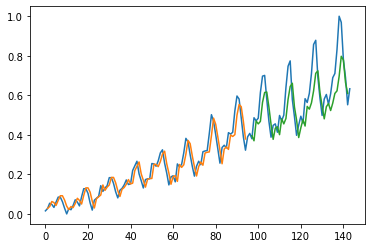

In [27]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)

In [28]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense


In [30]:
# convert an array of values into a datas
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [31]:
# fix random seed for reproducibility
numpy.random.seed(7)


In [32]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1],
engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [33]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [34]:
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [37]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)


Epoch 1/200
43/43 - 0s - loss: 4311.9961
Epoch 2/200
43/43 - 0s - loss: 2068.6948
Epoch 3/200
43/43 - 0s - loss: 1974.9419
Epoch 4/200
43/43 - 0s - loss: 1881.6199
Epoch 5/200
43/43 - 0s - loss: 1790.2406
Epoch 6/200
43/43 - 0s - loss: 1808.1915
Epoch 7/200
43/43 - 0s - loss: 1709.8190
Epoch 8/200
43/43 - 0s - loss: 1529.2731
Epoch 9/200
43/43 - 0s - loss: 1479.9496
Epoch 10/200
43/43 - 0s - loss: 1526.5028
Epoch 11/200
43/43 - 0s - loss: 1389.0494
Epoch 12/200
43/43 - 0s - loss: 1392.7959
Epoch 13/200
43/43 - 0s - loss: 1329.5554
Epoch 14/200
43/43 - 0s - loss: 1318.3571
Epoch 15/200
43/43 - 0s - loss: 1315.8802
Epoch 16/200
43/43 - 0s - loss: 1247.7068
Epoch 17/200
43/43 - 0s - loss: 1204.7946
Epoch 18/200
43/43 - 0s - loss: 1198.6962
Epoch 19/200
43/43 - 0s - loss: 1143.1371
Epoch 20/200
43/43 - 0s - loss: 1127.3271
Epoch 21/200
43/43 - 0s - loss: 1079.3062
Epoch 22/200
43/43 - 0s - loss: 1076.1055
Epoch 23/200
43/43 - 0s - loss: 1033.2755
Epoch 24/200
43/43 - 0s - loss: 1055.3257
E

Epoch 199/200
43/43 - 0s - loss: 136.8916
Epoch 200/200
43/43 - 0s - loss: 149.5325


In [38]:
#Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 128.26 MSE (11.32 RMSE)
Test Score: 538.19 MSE (23.20 RMSE)


In [39]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

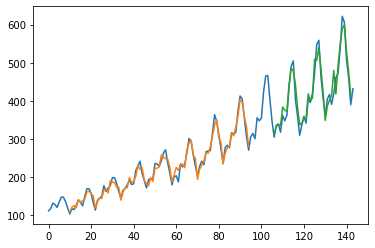

In [40]:
#plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()